# 图像分类数据集探索统计

同济子豪兄 https://space.bilibili.com/1900783

代码运行[云GPU平台](https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1)

2022-7-23

## 各类别数据个数柱状图

### 导入工具包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 设置中文字体（选择对应的操作系统）

In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [12]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果多次试验，中文字体还是显示为方块的话，就换 windows 吧
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

--2022-07-31 17:56:03--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/environment/minico 100%[===================>]   9.58M  21.5MB/s    in 0.4s    

2022-07-31 17:56:10 (21.5 MB/s) - ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



### 导入数据集统计表格

In [4]:
df = pd.read_csv('数据量统计.csv')

In [5]:
df.shape

(17, 4)

In [6]:
df

,class,trainset,testset,total
0,苦瓜,152.0,37.0,189.0
1,冬瓜,124.0,31.0,155.0
2,南瓜,148.0,37.0,185.0
3,人参果,147.0,36.0,183.0
4,羊角蜜,158.0,39.0,197.0
5,哈密瓜,158.0,39.0,197.0
6,白兰瓜,104.0,25.0,129.0
7,西瓜,159.0,39.0,198.0
8,佛手瓜,130.0,32.0,162.0
9,丝瓜,152.0,38.0,190.0


### 图像数量柱状图可视化

In [7]:
# 指定可视化的特征
feature = 'total'
# feature = 'trainset'
# feature = 'testset'

In [8]:
df = df.sort_values(by=feature,ascending=False)

In [9]:
df.head()

,class,trainset,testset,total
7,西瓜,159.0,39.0,198.0
5,哈密瓜,158.0,39.0,197.0
4,羊角蜜,158.0,39.0,197.0
16,木瓜,156.0,39.0,195.0
9,丝瓜,152.0,38.0,190.0


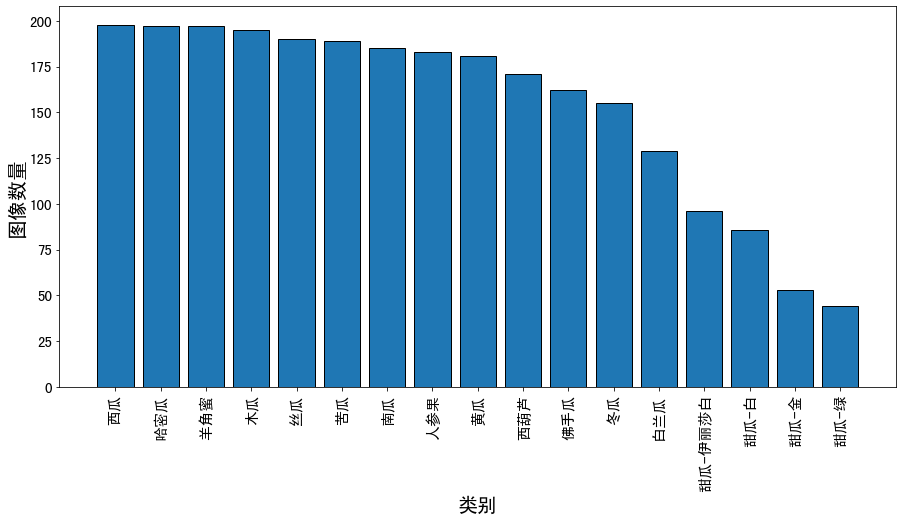

In [13]:
plt.figure(figsize=(15,7))
x = df['class']
y = df[feature]
plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.xlabel('类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)

# plt.savefig('各类别图片数量.pdf', dpi=120, bbox_inches='tight')

plt.show()

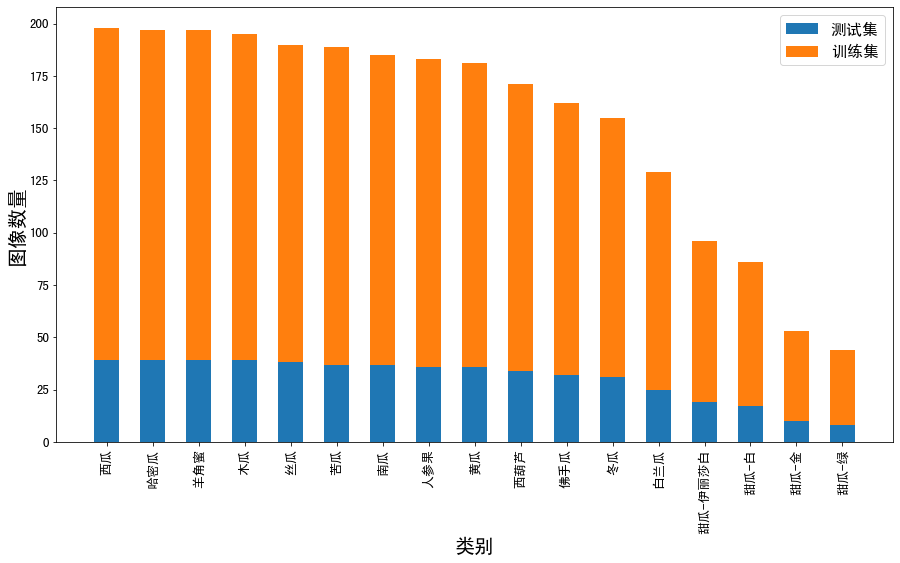

In [14]:
plt.figure(figsize=(15,8))
x = df['class']
y1 = df['testset']
y2 = df['trainset']

width = 0.55 # 柱状图宽度

plt.xticks(rotation=90) # 横轴文字旋转

plt.bar(x, y1, width, label='测试集')
plt.bar(x, y2, width, label='训练集', bottom=y1)


plt.xlabel('类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)
plt.tick_params(labelsize=13) # 设置坐标文字大小

plt.legend(fontsize=16) # 图例

# 保存为高清的 pdf 文件
plt.savefig('各类别图像数量.pdf', dpi=120, bbox_inches='tight')

plt.show()